Peregunta a ser respondida: Como poderíamos avaliar e prever/visualizar os agentes/fenômenos que mais
causam impactos socioeconômicos no Brasil?

In [33]:
#imports

#manipulação de dados
import pandas as pd
import numpy as np
#visualização de dados
import matplotlib.pyplot as ptl

#machine learning
from sklearn.neural_network import MLPRegressor #modelo de regressão linear
from sklearn.preprocessing import StandardScaler 
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge

from sklearn import datasets, linear_model
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.model_selection import KFold, cross_val_score

#formatar valores para 2 casas decimais
pd.options.display.float_format =  '{:.4f}'.format

In [34]:
#Visualizar dados atuais
data = pd.read_csv('\Desafio2\Modelo-Preditivo-Socioecon-mico\data\database_rispMG.csv', sep = ";")
data.head()

,risp,total_crimes,latitude,longitude,populacao,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida
0,1,156,-19.9167,-43.9345,2315560,3341.2000,0.8100,2.2200,76.3700
1,2,2808,-19.7668,-44.0868,1905395,1305.2020,0.6950,3.8810,75.2970
2,3,2808,-19.6944,-43.9237,988106,1495.4600,0.7150,3.5990,75.4640
3,4,13416,-21.7642,-43.3496,1574197,1150.6200,0.6730,4.8800,74.8310
4,5,4680,-19.7479,-47.9319,823093,1603.2000,0.7120,4.6430,76.4790


In [35]:
data.shape

(19, 9)

In [36]:
data.dtypes

risp                          int64
total_crimes                  int64
latitude                    float64
longitude                   float64
populacao                     int64
renda_media                 float64
idh_medio                   float64
taxa_de_analfabetismo(%)    float64
esperança_vida              float64
dtype: object

Engenharia de Atributos

In [37]:
#Numero de Crimes por 100 mil habitantes
data['crimes_porhab(100K)'] = data['total_crimes']/(data['populacao']/100000)

#Razão entre a renda média e o numero de crimes
data['crimes_renda'] = data['total_crimes']/data['renda_media']


#Razão entre taxa de analfabetismo e numero de crimes
data['crimes_educ'] = data['total_crimes']/data['taxa_de_analfabetismo(%)']

#Razão entre esperança de vida e renda média
data['esperança_vida_renda'] = data['esperança_vida']/data['renda_media']

#Razão entre esperança de vida e total de crimes
data['esperança_vida_renda'] = data['esperança_vida']/data['total_crimes']
data.head(19)


,risp,total_crimes,latitude,longitude,populacao,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
0,1,156,-19.9167,-43.9345,2315560,3341.2000,0.8100,2.2200,76.3700,6.7370,0.0467,70.2703,0.4896
1,2,2808,-19.7668,-44.0868,1905395,1305.2020,0.6950,3.8810,75.2970,147.3710,2.1514,723.5249,0.0268
2,3,2808,-19.6944,-43.9237,988106,1495.4600,0.7150,3.5990,75.4640,284.1800,1.8777,780.2167,0.0269
3,4,13416,-21.7642,-43.3496,1574197,1150.6200,0.6730,4.8800,74.8310,852.2440,11.6598,2749.1803,0.0056
4,5,4680,-19.7479,-47.9319,823093,1603.2000,0.7120,4.6430,76.4790,568.5870,2.9192,1007.9690,0.0163
5,6,6864,-21.2475,-44.9997,880430,1268.9700,0.6950,5.3770,75.2850,779.6190,5.4091,1276.5483,0.0110
6,7,7800,-20.1452,-44.8912,1182836,1361.8800,0.7020,4.3700,75.6690,659.4321,5.7274,1784.8970,0.0097
7,8,9048,-18.8545,-41.9459,687921,843.5800,0.6300,9.8450,73.2090,1315.2673,10.7257,919.0452,0.0081
8,9,2808,-18.9128,-48.2755,1100550,1500.4000,0.7140,3.9750,75.9820,255.1452,1.8715,706.4151,0.0271
9,10,3588,-19.0003,-46.3162,534508,1487.9900,0.7070,5.2030,75.6070,671.2715,2.4113,689.6022,0.0211


Retirar as colunas de coordenadas não necessárias para o estudo atual

In [38]:
#Salvando código de cada região para visualização
risp = data['risp']

data.drop('risp', axis=1, inplace=True)
data.drop('latitude', axis=1, inplace=True)
data.drop('longitude', axis=1, inplace=True)
data.drop('populacao', axis=1, inplace=True)

data.head()

,total_crimes,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
0,156,3341.2000,0.8100,2.2200,76.3700,6.7370,0.0467,70.2703,0.4896
1,2808,1305.2020,0.6950,3.8810,75.2970,147.3710,2.1514,723.5249,0.0268
2,2808,1495.4600,0.7150,3.5990,75.4640,284.1800,1.8777,780.2167,0.0269
3,13416,1150.6200,0.6730,4.8800,74.8310,852.2440,11.6598,2749.1803,0.0056
4,4680,1603.2000,0.7120,4.6430,76.4790,568.5870,2.9192,1007.9690,0.0163


In [39]:
#Descrição Estatística dos dados
data.describe()

,total_crimes,renda_media,idh_medio,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
count,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000,19.0000
mean,7003.5789,1289.0727,0.6851,6.2810,74.7971,739.4791,6.8496,1159.2202,0.0395
std,4259.5253,569.8813,0.0449,3.4176,1.2099,379.0842,5.2434,714.5262,0.1093
min,156.0000,663.0300,0.6070,2.2200,72.4720,6.7370,0.0467,70.2703,0.0049
25%,2808.0000,1004.0015,0.6625,4.1725,74.0535,572.4420,2.2813,698.0086,0.0078
50%,7800.0000,1238.8800,0.6950,5.1570,75.2850,776.2458,5.7274,919.0452,0.0097
75%,9438.0000,1454.0880,0.7070,6.9490,75.6380,988.9811,10.2473,1740.7776,0.0268
max,15132.0000,3341.2000,0.8100,16.0330,76.4790,1315.2673,18.1168,2749.1803,0.4896


In [40]:
#Separação dos Dados para treino, teste e validação
qtdLine = len(data)

qtdTrain = qtdLine - 9
qtdTest = qtdLine - 3
qtdValidade = qtdTrain - qtdTest

info = (
    f"linhas treino = 0:{qtdTrain}"
    f" linhas teste = {qtdTrain}:{qtdTest}"
    f" linhas validacao = {qtdTest}:{qtdLine}"

) 
info

'linhas treino = 0:10 linhas teste = 10:16 linhas validacao = 16:19'

Definição das Variáveis PREDITORAS e da Variável ALVO

In [41]:
target = data['idh_medio']
preditoras = data.drop('idh_medio', axis=1)

In [42]:
target.head()

0   0.8100
1   0.6950
2   0.7150
3   0.6730
4   0.7120
Name: idh_medio, dtype: float64

In [43]:
preditoras.head()

,total_crimes,renda_media,taxa_de_analfabetismo(%),esperança_vida,crimes_porhab(100K),crimes_renda,crimes_educ,esperança_vida_renda
0,156,3341.2000,2.2200,76.3700,6.7370,0.0467,70.2703,0.4896
1,2808,1305.2020,3.8810,75.2970,147.3710,2.1514,723.5249,0.0268
2,2808,1495.4600,3.5990,75.4640,284.1800,1.8777,780.2167,0.0269
3,13416,1150.6200,4.8800,74.8310,852.2440,11.6598,2749.1803,0.0056
4,4680,1603.2000,4.6430,76.4790,568.5870,2.9192,1007.9690,0.0163


Normalização dos Dados

In [44]:
scaler = StandardScaler().fit(preditoras)
predNormalizadas = scaler.transform(preditoras)

In [45]:
predNormalizadas.shape
print(predNormalizadas)

[[-1.65164383  3.69964841 -1.22082539  1.33564228 -1.98589365 -1.33298862
  -1.56577841  4.22822006]
 [-1.01197841  0.02907851 -0.72149248  0.42452205 -1.60474434 -0.92058669
  -0.62647726 -0.11944092]
 [-1.01197841  0.37208242 -0.80626784  0.56632734 -1.23396154 -0.97421792
  -0.54496122 -0.11888214]
 [ 1.54668325 -0.24960744 -0.42117123  0.02882585  0.30561795  0.94252163
   2.28617045 -0.31897827]
 [-0.56044988  0.56631994 -0.49241861  1.42819783 -0.46315549 -0.77014726
  -0.217481   -0.21784527]
 [-0.0336666  -0.03624184 -0.27176217  0.41433245  0.10878813 -0.28225853
   0.16870354 -0.26833294]
 [ 0.19209766  0.13125963 -0.57448838  0.74039971 -0.21694524 -0.21989656
   0.89964762 -0.28023655]
 [ 0.49311668 -0.80315012  1.07141633 -1.34846867  1.56051377  0.75949417
  -0.34534265 -0.29536314]
 [-1.01197841  0.38098843 -0.69323402  1.00617849 -1.31265251 -0.97542927
  -0.65107904 -0.11714891]
 [-0.82384153  0.35861524 -0.32407037  0.68775343 -0.18485771 -0.86965803
  -0.67525402 -0.

Separação dos dados para treinamento

In [46]:
#Treino
XTrain = predNormalizadas[0:qtdTrain]
YTrain = target[0:qtdTrain]

#Teste
XTest = predNormalizadas[qtdTrain:qtdTest]
YTest = target[qtdTrain:qtdTest]

#Quantidade de Registros
print("Treino: ", "X: ", len(XTrain), "Y: ", len(YTrain))
print("Teste: ", "X: ", len(XTest), "Y: ", len(YTest))

Treino:  X:  10 Y:  10
Teste:  X:  6 Y:  6


In [47]:
print(XTrain.shape, YTrain.shape)
print(XTest.shape, YTest.shape)


(10, 8) (10,)
(6, 8) (6,)


Utilizando Modelo de Regressão Linear

In [48]:
#Criação do Modelo
lr = linear_model.LinearRegression()

lr.fit(XTrain, YTrain)

#Previsão
pred = lr.predict(XTest)

#Avaliando Precisão
cd = r2_score(YTest, pred)
mae = mean_absolute_error(YTest, pred)

print(f"Coeficiente de regressão: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

Coeficiente de regressão: -3154.79
Erro Absoluto: 0.10417526636021357


Treinando Modelo de Rede Neural

In [49]:
ns = MLPRegressor(max_iter=5000)

#Treinamento
ns.fit(XTrain, YTrain)

#Previsão
pred = ns.predict(XTest)

#Avaliando Precisão
cd = r2_score(YTest, pred)
mae = mean_absolute_error(YTest, pred)

print(f"Coeficiente de regressão: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

Coeficiente de regressão: -4759.01
Erro Absoluto: 0.14289805174132494


Treinando Modelo de Arvore de Decisão

In [50]:
dt = DecisionTreeRegressor()

#Treinando Modelo
dt.fit(XTrain, YTrain)

pred = dt.predict(XTest)

cd = r2_score(YTest, pred)
mae = mean_absolute_error(YTest, pred)

print(f"Coeficiente de regressão: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

Coeficiente de regressão: -140.00
Erro Absoluto: 0.034999999999999996


Modelo de Rigid Regressor

In [51]:
rr = Ridge(alpha=1.0)

rr.fit(XTrain, YTrain)

pred = rr.predict(XTest)

cd = r2_score(YTest, pred)
mae = mean_absolute_error(YTest, pred)

print(f"Coeficiente de regressão: {cd * 100:.2f}")
print(f"Erro Absoluto: {mae}")

Coeficiente de regressão: 96.68
Erro Absoluto: 0.003342639473810305


Utilização de Cross-Vallidation no Treinamento dos Modelos

In [52]:
from sklearn.model_selection import KFold

In [53]:
cv = KFold(n_splits=5,shuffle=True,random_state=42)


In [54]:
folds = []

for train_idx, val_idx in cv.split(preditoras):
    X_train = preditoras.iloc[train_idx]
    X_val   = preditoras.iloc[val_idx]
    
    y_train = target.iloc[train_idx]
    y_val   = target.iloc[val_idx]
    
    folds.append((X_train, X_val, y_train, y_val, val_idx))


Modelo de Regressão Linear

In [55]:
cd = []
mae = []

for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    lr = linear_model.LinearRegression()

    lr.fit(X_train_s, y_train)

    #Previsão
    pred = lr.predict(X_val_s)

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    mae.append(mean_absolute_error(y_val, pred))

print(f"Coeficiente de regressão médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(mae)}")
print(f"Desvio padrão: {np.std(mae)}")

Coeficiente de regressão médio: 77.29
Erro Absoluto: 0.012534270489845286
Desvio padrão: 0.007637063747375689


Modelo de Rede Neural

In [56]:
cd = []
mae = []

for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    ns = MLPRegressor(max_iter=2000)

    ns.fit(X_train_s, y_train)

    #Previsão
    pred = ns.predict(X_val_s)

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    mae.append(mean_absolute_error(y_val, pred))

print(f"Coeficiente de regressão médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(mae)}")
print(f"Desvio padrão: {np.std(mae)}")

Coeficiente de regressão médio: -149039.48
Erro Absoluto: 0.5837390598764927
Desvio padrão: 1.023082394763702


Modelo de Arvore de Decisão

In [57]:
cd = []
mae = []

for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    dt = DecisionTreeRegressor()

    dt.fit(X_train_s, y_train)

    #Previsão
    pred = dt.predict(X_val_s)

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    mae.append(mean_absolute_error(y_val, pred))

print(f"Coeficiente de regressão médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(mae)}")
print(f"Desvio padrão: {np.std(mae)}")

Coeficiente de regressão médio: 68.73
Erro Absoluto: 0.014450000000000008
Desvio padrão: 0.0097229110867065


Modelo de Rigid Regressor

In [58]:
cd = []
maeRigid = []
predictList = np.zeros(len(target))


for X_train, X_val, y_train, y_val, val_idx in folds:
    scaler = StandardScaler()
    
    X_train_s = scaler.fit_transform(X_train)
    X_val_s   = scaler.transform(X_val)

    #Criação do Modelo
    rr = Ridge(alpha=1.0)

    rr.fit(X_train_s, y_train)

    #Previsão
    pred = rr.predict(X_val_s)

    predictList[val_idx] = pred

    #Avaliando Precisão
    cd.append(r2_score(y_val, pred))
    maeRigid.append(mean_absolute_error(y_val, pred))


print(f"Coeficiente de regressão médio: { np.mean(cd)* 100:.2f}")
print(f"Erro Absoluto: {np.mean(maeRigid)}")
print(f"Desvio padrão: {np.std(maeRigid)}")

Coeficiente de regressão médio: 93.61
Erro Absoluto: 0.006691502534112842
Desvio padrão: 0.0028180913263950607


Modelo Rigid Regressor apresentou melhor eficiência tanto utilizando um split de dados fixo quado utilizando cross-vallidation

Prova dos resultados

In [59]:

idhReal = data['idh_medio']
predict = predictList

proofTable = pd.DataFrame({'RISP': risp, 'IDH real': idhReal, 'IDH previsto':predict})
proofTable

,RISP,IDH real,IDH previsto
0,1,0.8100,0.8390
1,2,0.6950,0.7075
2,3,0.7150,0.7094
3,4,0.6730,0.6809
4,5,0.7120,0.7194
5,6,0.6950,0.6906
6,7,0.7020,0.7008
7,8,0.6300,0.6410
8,9,0.7140,0.7159
9,10,0.7070,0.7021


C:\Users\Meu computador\AppData\Local\Temp\ipykernel_1464\2134466233.py:11: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  leg = ptl.legend()


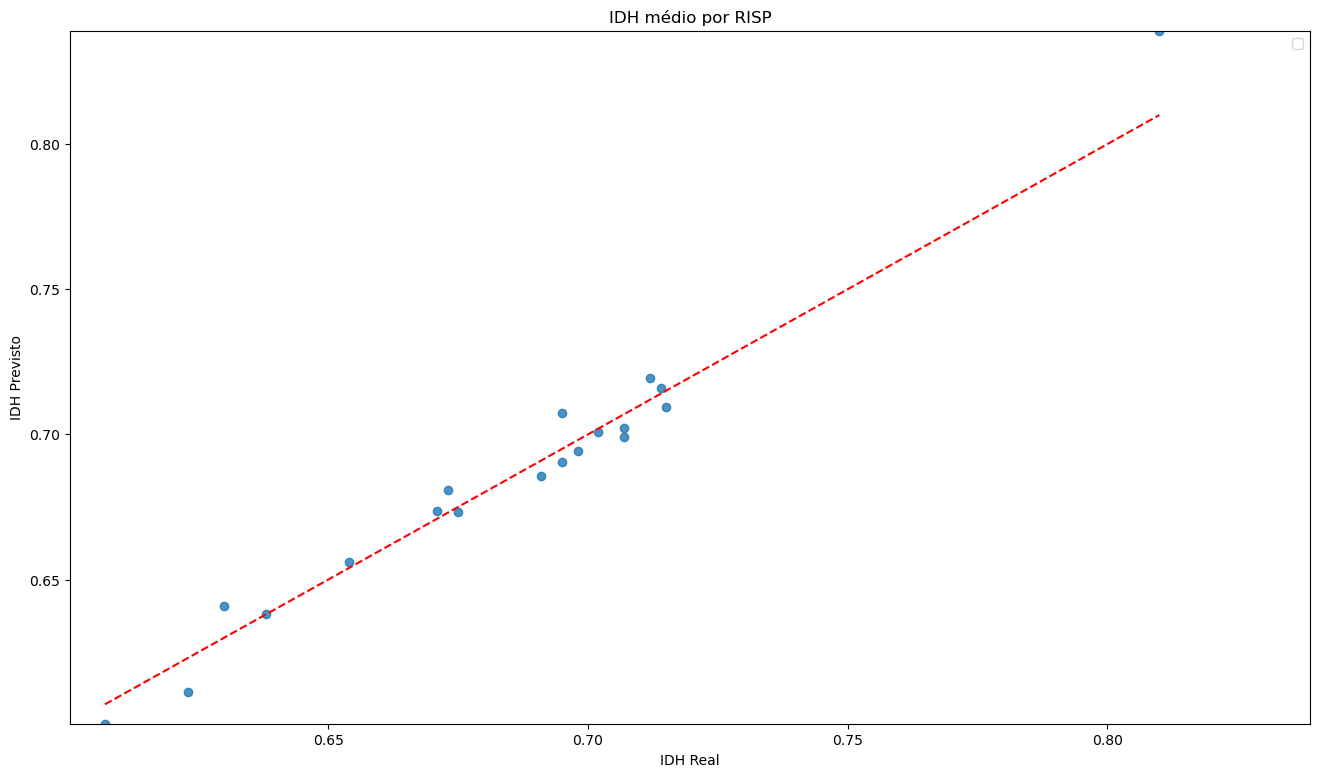

In [60]:
#Gerar Gráfico
ptl.figure(figsize=(16,9))
ptl.scatter(target, predictList, alpha=0.8)
ptl.plot([target.min(), target.max()], [target.min(), target.max()], 'r--')
limit = [min(target.min(), predictList.min()), max(target.max(), predictList.max())]
ptl.xlim(limit)
ptl.ylim(limit)
ptl.title("IDH médio por RISP")
ptl.xlabel("IDH Real")
ptl.ylabel("IDH Previsto")
leg = ptl.legend()

O gráfico de dispersão entre os valores reais e previstos do IDH indica elevada aderência do modelo Ridge à diagonal de referência, sugerindo bom desempenho preditivo.

Utilizando o método LOFO (Leave-One-Feature-Out) como primeira forma de avaliar o comportamento de cada parâmetro na previsão do IDH

Utilizaremos o erro absoluto obtido na média das previsões feitas utilizando Cross-Validation como base de comparação para os novos erros que serão gerados ao fazer as previsões retirando paramêtros

In [66]:
maeBase = np.mean(maeRigid) #Variavel que vem da ultima célula de treinamento
impactoLofo = {}

for column in preditoras.columns:
    preditorasDrop = preditoras.drop(columns=[column])

    #criação de uma lista de erros nas previsões
    maeVet = []

    for train_idx, val_idx in cv.split(preditorasDrop):
        X_train = preditorasDrop.iloc[train_idx]
        X_val = preditorasDrop.iloc[val_idx]
        y_train = target.iloc[train_idx]
        y_val = target.iloc[val_idx]

        #Normalização
        scaler = StandardScaler()
        X_train_s = scaler.fit_transform(X_train)
        X_val_s = scaler.transform(X_val)

        #Criação e treinamento do modelo 
        rr = Ridge(alpha=1.0)
        rr.fit(X_train_s, y_train)
        
        #Previsão
        pred = rr.predict(X_val_s)
        #Adiciona um novo erro à lista de erros do fold
        maeVet.append(mean_absolute_error(y_val, pred))

    impactoLofo[column] = np.mean(maeVet) - maeBase
    print(f"Erro sem a coluna {column}: {np.mean(maeVet)}. Delta erro: {impactoLofo[column]}")


Erro sem a coluna total_crimes: 0.00822465158039844. Delta erro: 0.0015331490462855988
Erro sem a coluna renda_media: 0.009366137237010236. Delta erro: 0.0026746347028973943
Erro sem a coluna taxa_de_analfabetismo(%): 0.016217141101003186. Delta erro: 0.009525638566890343
Erro sem a coluna esperança_vida: 0.009094672681471034. Delta erro: 0.002403170147358192
Erro sem a coluna crimes_porhab(100K): 0.012959552065012961. Delta erro: 0.006268049530900119
Erro sem a coluna crimes_renda: 0.009960360814939806. Delta erro: 0.0032688582808269645
Erro sem a coluna crimes_educ: 0.005425051758917136. Delta erro: -0.001266450775195706
Erro sem a coluna esperança_vida_renda: 0.006678335246711892. Delta erro: -1.3167287400949954e-05


Utilizar como base de análise:

ΔErro > 0
remover a variável piora o modelo
variável importante

ΔErro ≈ 0
variável redundante

ΔErro < 0
remover a variável melhora o modelo
possível ruído / colinearidade

Total de crimes => Piora pouco o modelo quando é removida (variável com certa importância)

Renda Média => Piora o modelo quando é removida (variável importante)

Taxa de analfabetismo => Piora muito o modelo quando removida (variável de extrema importância)

Esperança de Vida => Piora o modelo quando removida (variável importante)

Crimes por 100 mil habitantes => Piora muito o modelo quando removida (variável de extrema importância)

Crimes por média de renda => Piora o modelo quando removida (variável importante)

Crimes por taxa de alfabetização => Melhora o modelo quando removida (Possível ruído)

Esperança de vida por renda média => Variável redundante  

A variável taxa de analfabetismo foi a que teve maior diferença positiva no erro, ou seja, para o modelo é a variável mais importante, sendo de grande impacto para a definição do IDH

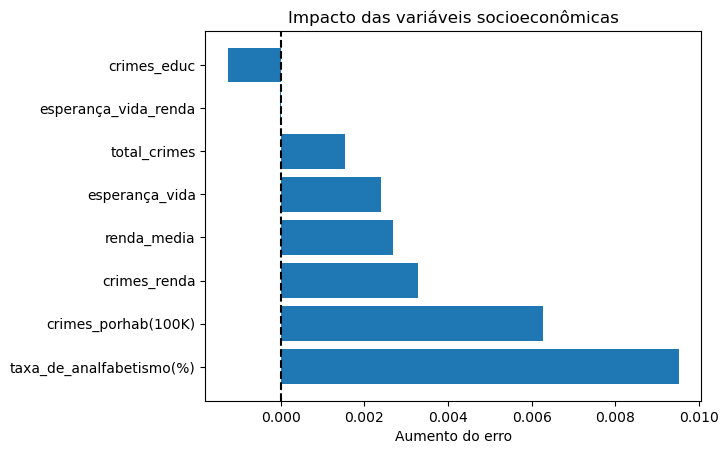

In [70]:
#visualização

dfLofo = pd.DataFrame({"Variável":impactoLofo.keys(), "Diferença de Erro":impactoLofo.values()}).sort_values("Diferença de Erro", ascending=True)

ptl.Figure(figsize=(16,9))
ptl.title("Impacto das variáveis socioeconômicas")
ptl.barh(dfLofo["Variável"], dfLofo["Diferença de Erro"])
ptl.axvline(0, color='k', linestyle='--')
ptl.xlabel("Aumento do erro")
ptl.gca().invert_yaxis()